RITWEEK RAJ
rithik1234keshri@gmail.com
9905601681
task-2

Exploratory Data Analysis on IPL Data






The Indian Premier League is a professional Twenty20 cricket league, contested by eight teams based out of eight different Indian cities. Being a fan of the IPL, I was drawn to this dataset as soon as I saw it on Kaggle. I did some EDA and found some really cool insights which I am here to share. Please share any insights, suggestions through comments.

About the Dataset
This dataset consists of two seperate CSV files : matches and deliveries. These files contain information of each match summary and ball by ball details, respectively.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set_style("white")
sns.set_palette("husl", 14, 1)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Data Preparation and Cleaning

Matches

In [ ]:
matches = pd.read_csv('/IPL Matches 2008-2020.csv')
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Let's check if the dataset contains Nan values

In [ ]:
match_na = matches.isna().sum()
match_na[match_na > 0]

city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64

After inspecting the dataset we found that the columns winner, result, player_of_match has 4 nans. We found that the matches that were tied due to rains have nans in these columns. We can drop the nan rows as it will not affect our analysis.

In [ ]:
matches = matches.dropna(subset = ['winner', 'result', 'player_of_match'])
matches.shape

(812, 17)

The column 'method' has the highest number of NaNs in the dataset. The best course of action would probably be to drop the entire column. However, the rows where the 'method' column does have values are those matches where D/L method was used. Let us store it in another DataFrame and drop 'method' from matches.

In [ ]:
DL = matches.dropna(subset = ['method'])
matches = matches.drop('method', axis = 1)

In [ ]:
DL.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene


Matches that were held in Dubai International Stadium had NaNs in their city column.

In [ ]:
matches.loc[matches.city.isna(), 'city'] = 'Dubai'

Lets take a look at the 'result_margin' column which has na values.

In [ ]:
matches.loc[matches.result_margin.isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary


After close inspection, we found that result_margin has nans in matches that were tied.

In [ ]:
matches.loc[matches.result == 'tie', 'result_margin'] = 0

Let's see if all the na values are taken care of...

In [ ]:
match_na = matches.isna().sum()
match_na[match_na > 0]

Series([], dtype: int64)

After inspecting the matches dataset, we found that the team 'Rising Pune Supergiant' is written as 'Rising Pune Supergiants'. Also, Delhi Daredevils and Delhi Capitals are the same team. Lets fix this.

In [ ]:
matches.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [ ]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

Deliveries

In [ ]:
deliveries = pd.read_csv('/IPL Ball-by-Ball 2008-2020.csv')
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

Let's fix the team names same as Matches.

In [ ]:
deliveries.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [ ]:
deliveries.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

Exploratory Data Analysis

How many matches are played each year in IPL?

In [ ]:
matches["Year"] = matches["date"].apply(lambda x:x.split("-")[0])
matches['Year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [ ]:
match_count = matches['Year'].value_counts().sort_index()

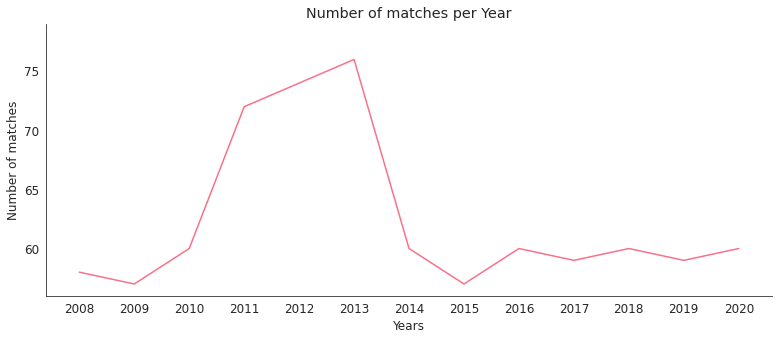

In [ ]:
sns.lineplot(x = match_count.index, y = match_count.values, )
sns.despine()
plt.ylabel('Number of matches')
plt.xlabel('Years')
plt.ylim((56, 79))
_ = plt.title('Number of matches per Year')

Year 2013 witnessed most matches throughout 2008 - 2020

How many matches did the teams played throughout the IPL(2008-2020)?

In [ ]:
# Total matches played by a team
partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
total_matches.head()

Mumbai Indians                 203
Royal Challengers Bangalore    192
Kolkata Knight Riders          192
Delhi Capitals                 192
Kings XI Punjab                190
dtype: int64

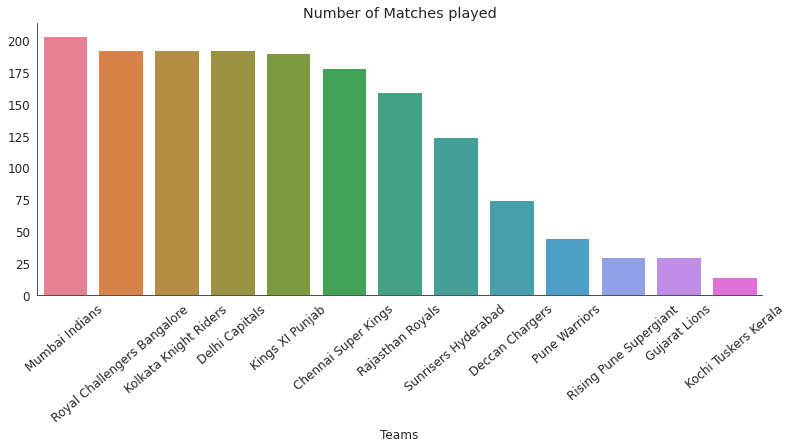

In [ ]:
sns.barplot(x = total_matches.index, y = total_matches.values)
sns.despine()
_ = plt.xticks(rotation = 40)
plt.title('Number of Matches played')
_ = plt.xlabel('Teams')

Does winning the toss affects the outcome of a match for a team?

In [ ]:
toss_match_wins = matches.loc[(matches['toss_winner'] == matches['winner']), 'toss_winner'].value_counts()
toss_match_wins.head()

Chennai Super Kings      61
Mumbai Indians           61
Kolkata Knight Riders    55
Delhi Capitals           45
Rajasthan Royals         44
Name: toss_winner, dtype: int64

In [ ]:
win_per_after_toss = np.divide(toss_match_wins, total_matches)*100

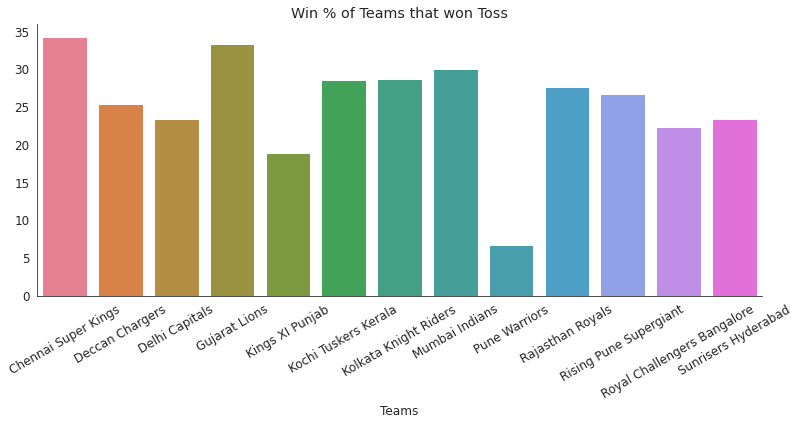

In [ ]:
sns.barplot(x = win_per_after_toss.index, y = win_per_after_toss.values, )
sns.despine()
_ = plt.xticks(rotation = 30)
plt.title('Win % of Teams that won Toss')
_ = plt.xlabel('Teams')

All the percentages are below 50%, hence there isn't any evidence that suggests that winning the toss would increase the chances of winning the match.

Here I just want to see what would be the chances for a certain team to win a match if it wins the toss.

In [ ]:
# When Teams won the toss as well as the match
match_win = matches.loc[matches['winner'] == matches['toss_winner'], 'toss_winner'].value_counts()

# Won toss but lost match = Total times teams won toss - WON both toss and match 
match_lose = matches['toss_winner'].value_counts() - match_win
match_lose

Chennai Super Kings            36
Deccan Chargers                24
Delhi Capitals                 54
Gujarat Lions                   5
Kings XI Punjab                49
Kochi Tuskers Kerala            4
Kolkata Knight Riders          43
Mumbai Indians                 45
Pune Warriors                  17
Rajasthan Royals               41
Rising Pune Supergiant          5
Royal Challengers Bangalore    43
Sunrisers Hyderabad            28
Name: toss_winner, dtype: int64

In [ ]:
ticks = ['CSK', 'DC', 'DelhiC', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RCB', 'SRH']
match_win.sort_index(inplace = True)
match_lose.sort_index(inplace = True)
x = np.arange(len(ticks))
width = 0.4

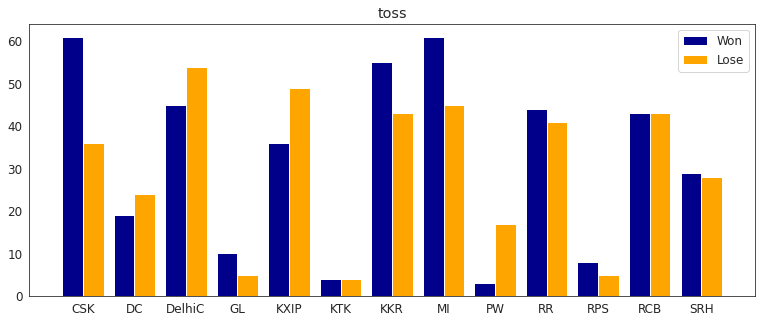

In [ ]:
plt.bar(x = x-0.2, height = match_win.values, width = width, label = 'Won', color = 'darkblue')
plt.bar(x = x+0.2, height = match_lose.values, width = width, label = 'Lose', color = 'orange')
plt.xticks(x, ticks)
plt.legend()
_ = plt.title('toss')

We can see that there are teams that have actually lost more matches than they have won after winning the toss.

Which team has the highest win percentage?

In [ ]:
winner_counts = matches['winner'].value_counts()
win_per = np.round(np.divide(winner_counts, total_matches)*100).sort_values(ascending = False)
win_per.head()

Chennai Super Kings      60.0
Mumbai Indians           59.0
Sunrisers Hyderabad      53.0
Kolkata Knight Riders    52.0
Rajasthan Royals         51.0
dtype: float64

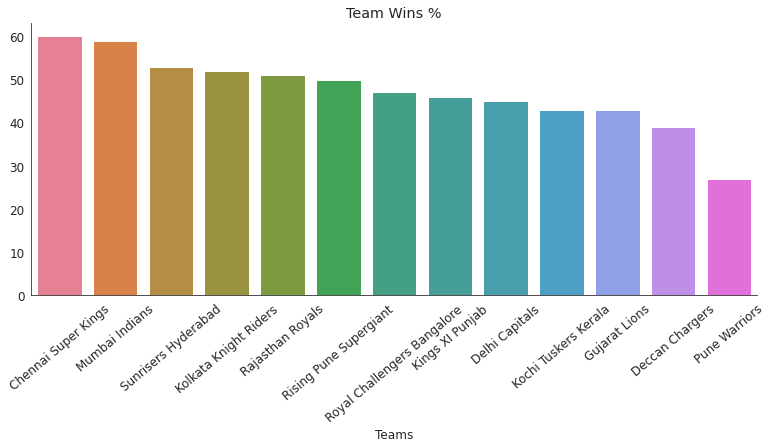

In [ ]:
sns.barplot(x = win_per.index, y = win_per.values,)
sns.despine()
_ = plt.xticks(rotation = 40)
plt.title('Team Wins %')
_ = plt.xlabel('Teams')

Chennai Super Kings has the highest win percentage of 60% among the all the teams.

Which batsman hit the most number of sixes?

In [ ]:
batsman_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['batsman']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
batsman_sixes.head()

,sixes
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202


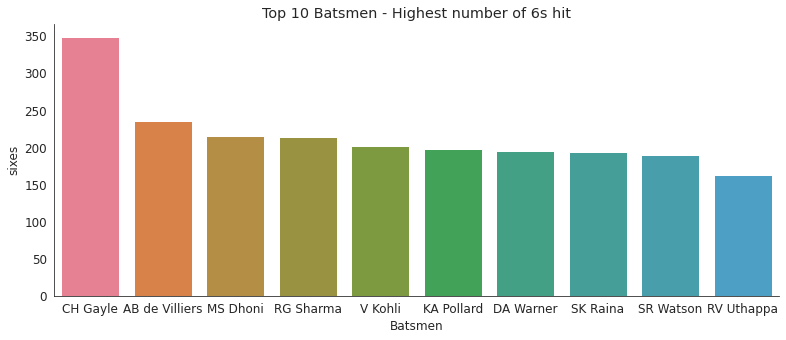

In [ ]:
sns.barplot(x = batsman_sixes.index, y = batsman_sixes.sixes)
sns.despine()
plt.title('Top 10 Batsmen - Highest number of 6s hit')
_ = plt.xlabel('Batsmen')

Chris Gayle hit the highest number of sixes during the IPL.

Which batsman hit the most number of 4s?

In [ ]:
batsman_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['batsman']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel('batsman_runs')
batsman_4s.head()

,fours
batsman,
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492


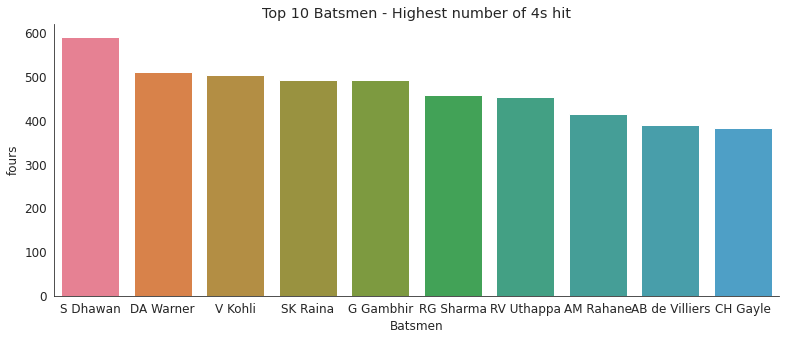

In [ ]:
sns.barplot(x = batsman_4s.index, y = batsman_4s.fours, )
sns.despine()
plt.title('Top 10 Batsmen - Highest number of 4s hit')
_ = plt.xlabel('Batsmen')

Shikhar Dhavan hit the most number of 4s.

Which bowler gave the most number of 6s?



In [ ]:
bowler_6s = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['bowler']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
bowler_6s.head()

,sixes
bowler,
PP Chawla,181
A Mishra,172
RA Jadeja,148
Harbhajan Singh,142
DJ Bravo,138


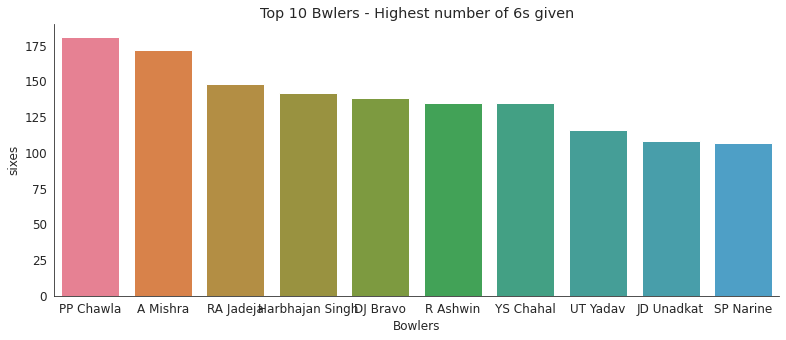

In [ ]:
plt.figure(figsize = ( 13, 5 ))
sns.barplot(x = bowler_6s.index, y = bowler_6s.sixes, )
sns.despine()
plt.title('Top 10 Bwlers - Highest number of 6s given')
_ = plt.xlabel('Bowlers')

Batsmen hit most number of 6s against PP Chawla

Which bowler gave the most number of 4s?

In [ ]:
bowler_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['bowler']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel(1)

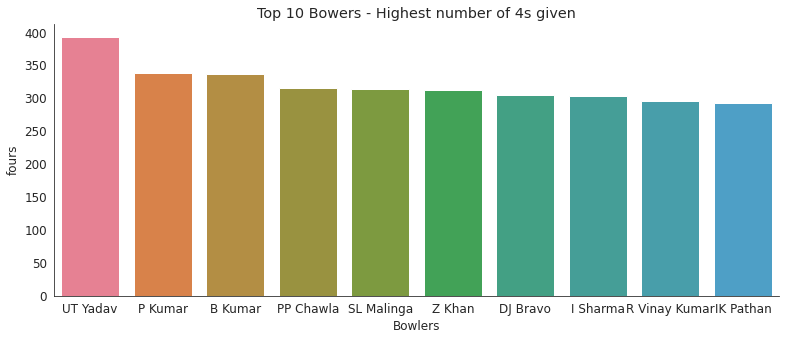

In [ ]:
sns.barplot(x = bowler_4s.index, y = bowler_4s.fours, )
sns.despine()
plt.title('Top 10 Bowers - Highest number of 4s given')
_ = plt.xlabel('Bowlers')

Batsmen hit most number of 4s against UT Yadav

I have always wondered whether the teams batting in Inning1 has more advantage over their rival teams.
Which teams are more likely to win ?

In [ ]:
total_runs_inning = deliveries.groupby(by =['id', 'inning']).agg({'total_runs':'sum'}).reset_index()
winners_ = pd.pivot_table(data = total_runs_inning, columns = 'inning', index = 'id', values = 'total_runs')
winners_['won'] = np.where(winners_[1]>winners_[2], 'Innings 1', 'Innings 2')
winners_['won'] = np.where(winners_[1]==winners_[2], 'draw', winners_['won'])
winners_.head()

inning,1,2,won
id,,,
335982,222.0,82.0,Innings 1
335983,240.0,207.0,Innings 1
335984,129.0,132.0,Innings 2
335985,165.0,166.0,Innings 2
335986,110.0,112.0,Innings 2


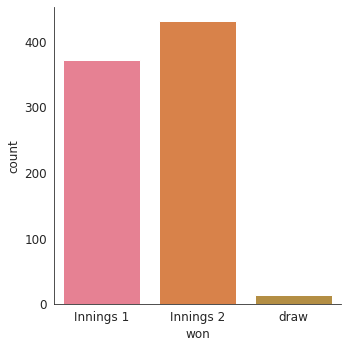

In [ ]:
sns.catplot(x="won", kind="count", data=winners_)

We can see that the teams playing in the second innings have a slightly better chance at winning. So getting to bat first may not always be the correct alernative.

Which player was awarded the Player of the Match most number of times?

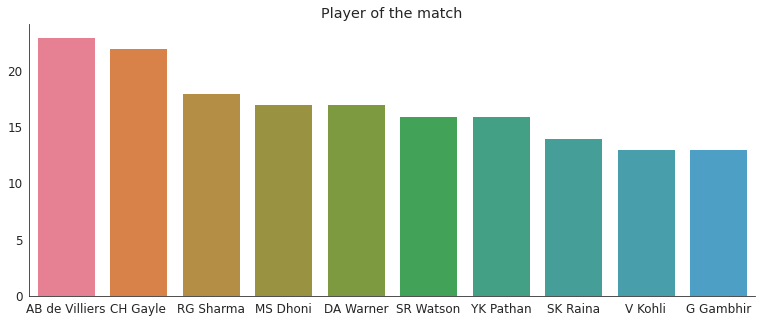

In [ ]:
pom = matches['player_of_match'].value_counts().sort_values(ascending=False).iloc[:10]
sns.barplot(x=pom.index,  y = pom.values, data=matches)
sns.despine()
_ = plt.title('Player of the match')

AB de Villiers was awarded Player of the match most number of times.

Let's move on to some Player Statistics.

Let's count the Centuries scored by each batsmen in each match. Also, we would like to have other information on our batsmen say, Strike rate, total runs scored and balls faced.



In [ ]:
runs = deliveries.groupby(by =['batsman', 'id']).agg({'batsman_runs':'sum'})
centuries = runs['batsman_runs'].apply(lambda x: (x // 100)).sum(level = 0)

Wides and noballs are not counted in batsman's record as well as any runs scored on an extras_type ball. So in order to account for that we are not considering wides, noballs, penalty.

In [ ]:
k = deliveries[~(deliveries['extras_type'].isin(['wides', 'noballs', 'penalty']))]

In [ ]:
batsman_stats = k.groupby(by =['batsman']).agg({'batsman_runs':'sum', 'ball': 'count'})
batsman_stats['Strike_rate'] = 100*batsman_stats['batsman_runs']/batsman_stats['ball']
batsman_stats['Centuries'] = centuries
batsman_stats.head()

,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
A Ashish Reddy,280,193,145.077720,0
A Chandila,4,7,57.142857,0
A Chopra,53,71,74.647887,0
A Choudhary,25,20,125.000000,0
A Dananjaya,4,5,80.000000,0


Which player scored the most number of centuries?

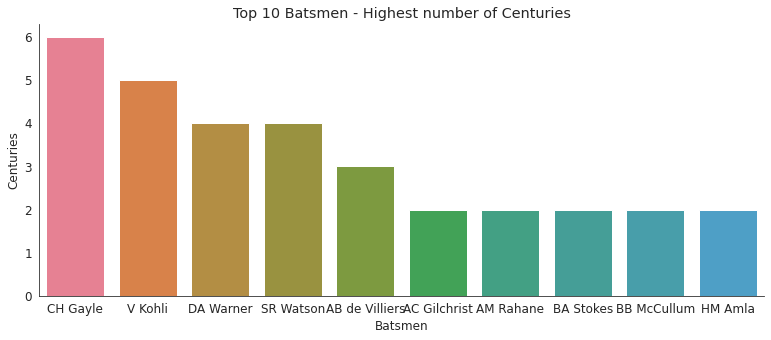

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Centuries')
sns.barplot(x = top10.index, y = top10['Centuries'], )
sns.despine()
plt.title('Top 10 Batsmen - Highest number of Centuries')
plt.ylabel('Centuries')
_ = plt.xlabel('Batsmen')

Chris Gayle scored 6 centuries which is the highest of all.

Which batsman has the highest runs?

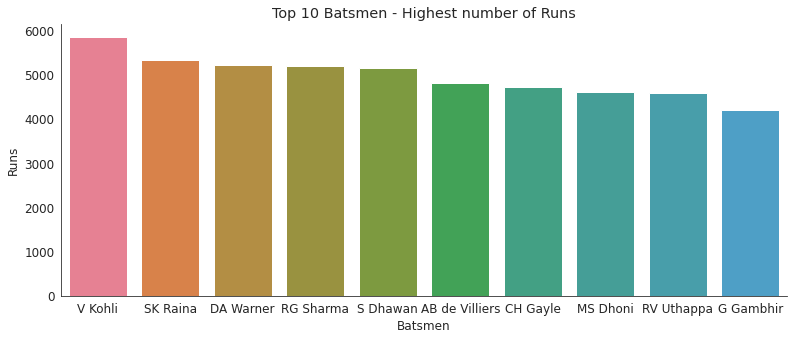

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'batsman_runs')
sns.barplot(x = top10.index, y = top10['batsman_runs'], )
sns.despine()
plt.title('Top 10 Batsmen - Highest number of Runs')
plt.ylabel('Runs')
_ = plt.xlabel('Batsmen')

Virat Kohli scored the highest number of runs throuhout the IPL.

Which player has the highest strike rate?

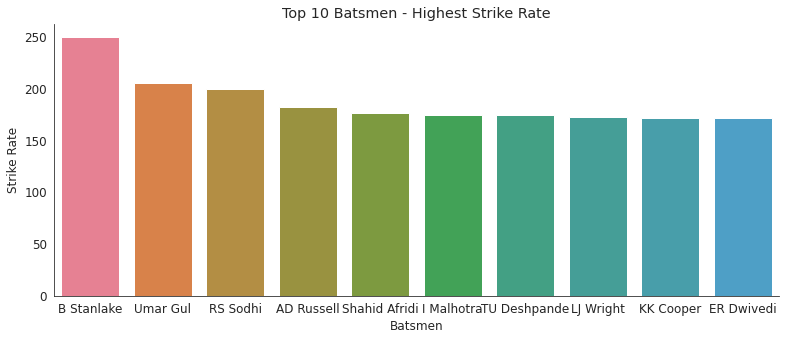

In [ ]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Strike_rate')
sns.barplot(x = top10.index, y = top10['Strike_rate'], )
sns.despine()
plt.title('Top 10 Batsmen - Highest Strike Rate')
plt.ylabel('Strike Rate')
_ = plt.xlabel('Batsmen')

B Stanlake has the highest Strike rate.

Similarly, we would also like to have some statistics on our bowlers as well, for e.g. total wickets, Maidens, Strike rate (balls / wicket), Bowling Average (Total runs / wickets).

Data Preparation.

In [ ]:
run_per_over = deliveries.groupby(by =['bowler', 'id', 'over']).agg({'total_runs':'sum'})
maidens = run_per_over['total_runs'].apply(lambda x: x == 0).sum(level = 0)

In [ ]:
bowler_stats = deliveries.groupby(by ='bowler').agg({'total_runs':'sum', 'ball': 'count', 'is_wicket':'sum'})
bowler_stats['Strike_rate'] = np.divide(bowler_stats['ball'], bowler_stats['is_wicket'])
bowler_stats['BowlingAve'] = np.divide(bowler_stats['total_runs'], bowler_stats['is_wicket'])
bowler_stats['Maidens'] = maidens.astype('int32')
bowler_stats.head()

,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
A Ashish Reddy,400,270,19,14.210526,21.052632,0
A Chandila,245,234,11,21.272727,22.272727,0
A Choudhary,144,108,5,21.600000,28.800000,2
A Dananjaya,47,25,0,inf,inf,0
A Flintoff,106,66,2,33.000000,53.000000,0


Which Bowler has delivered the most balls?

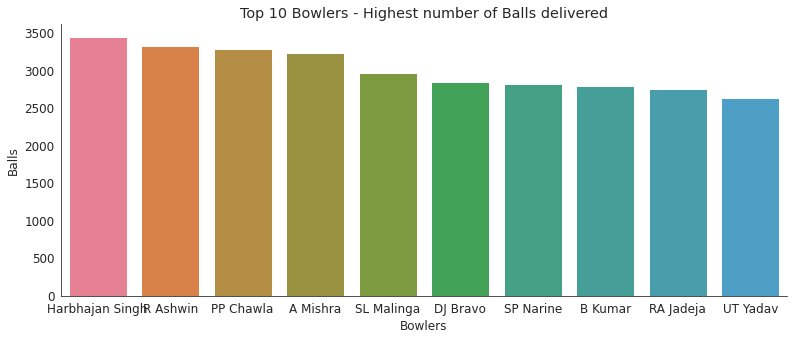

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'ball')
sns.barplot(x = top10.index, y = top10['ball'], )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Balls delivered')
plt.ylabel('Balls')
_ = plt.xlabel('Bowlers')

Harbhajan Singh delivered the most balls.

Which bowler took the most wickets?

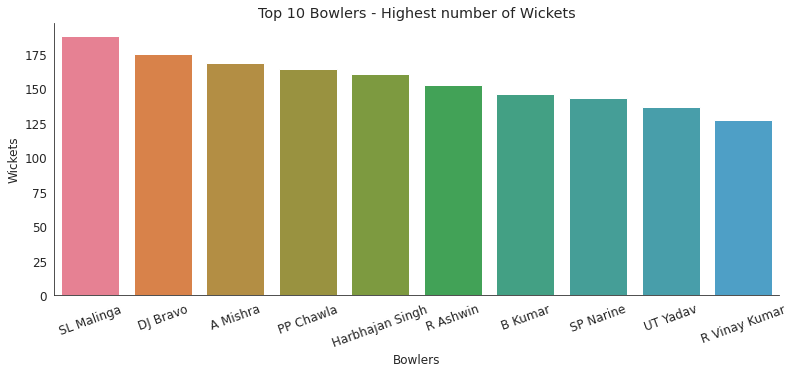

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'is_wicket')
sns.barplot(x = top10.index, y = top10['is_wicket'], )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Wickets')
plt.ylabel('Wickets')
_ = plt.xlabel('Bowlers')
_ = plt.xticks(rotation = 20)

SL Malinga took the most number of wickets.

Which bowler delivered the most number of Maidens?

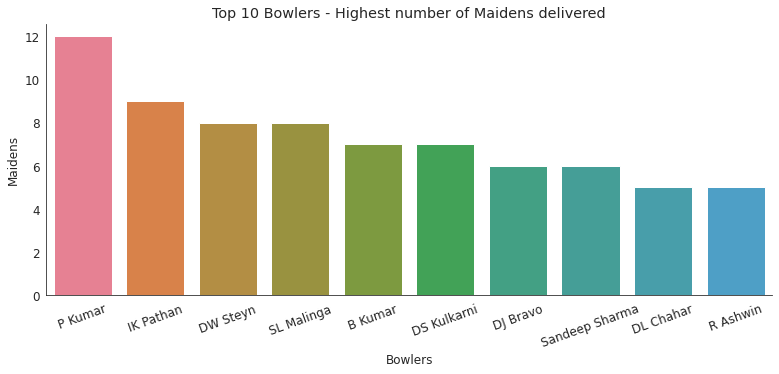

In [ ]:
top10 = bowler_stats.nlargest(n = 10, columns = 'Maidens')
sns.barplot(x = top10.index, y = top10['Maidens'], )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Maidens delivered')
plt.ylabel('Maidens')
_ = plt.xlabel('Bowlers')
_ = plt.xticks(rotation = 20)

P Kumar delivered the most number of maiden.

Which batsmen has played the most number of matches throughout the IPL?

In [ ]:
matches_played_batsman = deliveries.groupby(by = ['batsman', 'id'], as_index=False).size().reset_index()['batsman'].value_counts()
matches_played_batsman = matches_played_batsman.sort_values(ascending = False).iloc[:10]

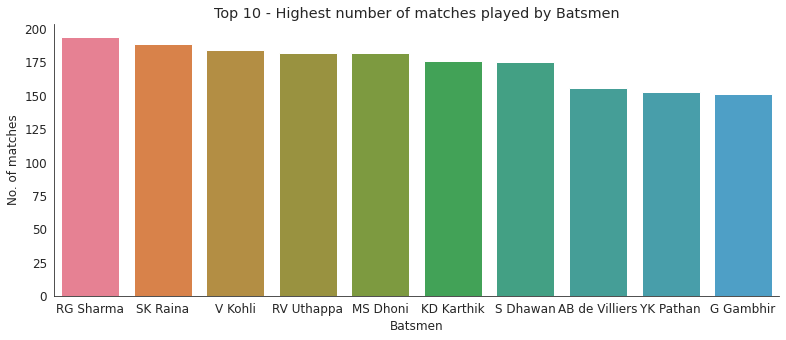

In [ ]:
sns.barplot(x = matches_played_batsman.index, y = matches_played_batsman.values)
sns.despine()
plt.title('Top 10 - Highest number of matches played by Batsmen')
plt.ylabel('No. of matches')
_ = plt.xlabel('Batsmen')

Rohit Sharma has played the most number of matches.

Which bowlers played the most number of matches throughout the IPL?

In [ ]:
matches_played_bowler = deliveries.groupby(by = ['bowler', 'id'], as_index=False).size().reset_index()['bowler'].value_counts()
matches_played_bowler = matches_played_bowler.sort_values(ascending = False).iloc[:10]

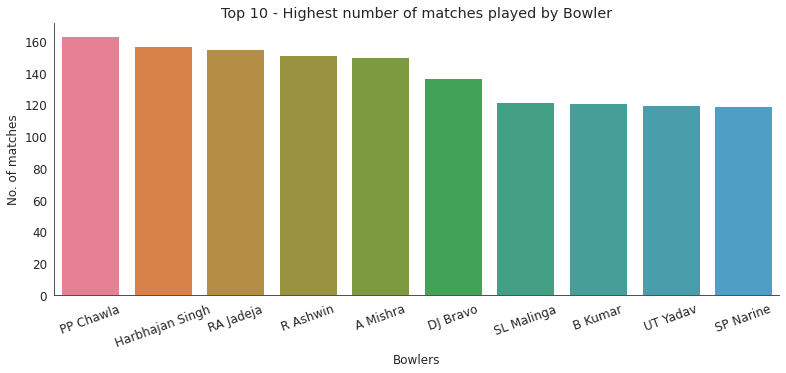

In [ ]:
sns.barplot(x = matches_played_bowler.index, y = matches_played_bowler.values,)
sns.despine()
plt.title('Top 10 - Highest number of matches played by Bowler')
plt.ylabel('No. of matches')
plt.xticks(rotation = 20)
_ = plt.xlabel('Bowlers')

PP Chawla has played the most number of matches.

THANK YOU